In [1]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)

import pandas as pd
df = pd.read_csv('data/score.csv')
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기
0,1번,채치수,북산고,197,90,85,100,95,85,Python
1,2번,정대만,북산고,184,40,35,50,55,25,Java
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript
3,4번,서태웅,북산고,187,40,60,70,75,80,Java
4,5번,강백호,북산고,188,15,20,10,35,10,Java
5,6번,변덕규,능남고,202,80,100,95,85,80,C#
6,7번,황태산,능남고,188,55,65,45,40,35,Python
7,8번,윤대협,능남고,190,100,85,90,95,95,C#


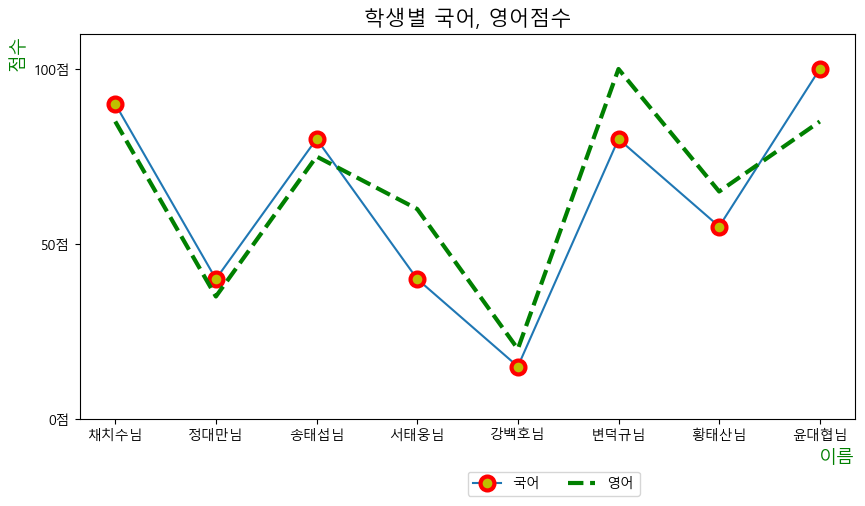

In [2]:
#학생별(이름) 국어, 영어, 수학점수 꺾은선 그래프
plt.figure(figsize=(10, 5))
plt.title('학생별 국어, 영어점수', size=15)
plt.plot(df['이름'], df['국어'], label='국어',
        marker='o', ms=10, mec='red', mew=3, mfc='y')
plt.plot(df['이름'], df['영어'], label='영어', lw=3, ls='--', c='g')
plt.legend(loc='lower right')
plt.legend(loc=(0.5, -0.2), ncol=2)
plt.ylim(0, 110)
yticks = [y for y in range(0, 101, 50)]
plt.yticks(yticks, [f'{y}점' for y in yticks])
plt.xticks(df['이름'], [x+'님' for x in df['이름']])
plt.xlabel('이름', size=13, loc='right', c='g')
plt.ylabel('점수', size=13, loc='top', c='g')

plt.show()

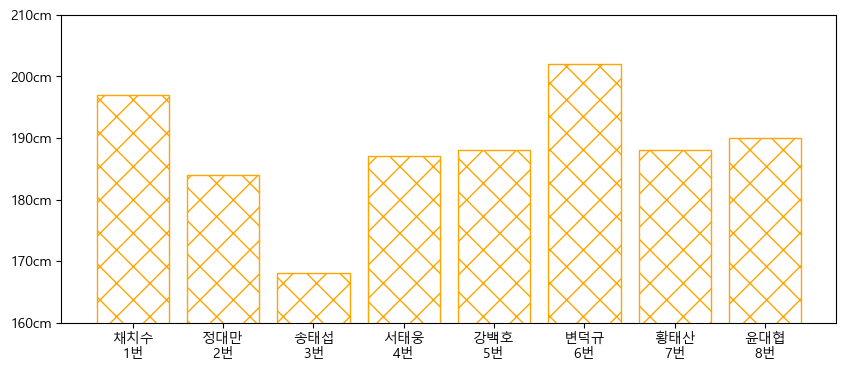

In [3]:
#학생별(이름) 키 막대그래프
plt.figure(figsize=(10, 4))
plt.bar(df['이름'], df['키'], color='none', hatch='x', ec='orange')
plt.ylim(160, 210)
yticks = [y for y in range(160, 211, 10)]
plt.yticks(yticks, [f'{y}cm' for y in yticks])
xticks = [f"{df.loc[x, '이름']}\n{df.loc[x, '지원번호']}" for x in range(len(df))]
plt.xticks(df['이름'], xticks)
plt.show()

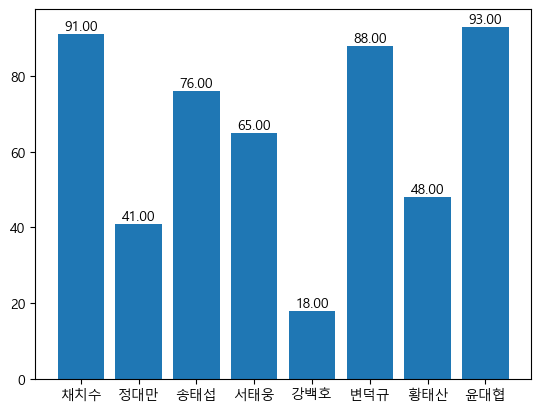

In [4]:
#학생별 평균점수 막대그래프
df['평균'] = df.apply(lambda row:row['국어':'사회'].mean(), axis=1)

plt.bar(df['이름'], df['평균'])
for idx, avg in enumerate(df['평균']):
    plt.text(idx, avg+1, f'{avg:.2f}', ha='center')
plt.show()

In [5]:
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


In [6]:
group = df.groupby('SW특기').size()
group

SW특기
C#            2
Java          3
Javascript    1
Python        2
dtype: int64

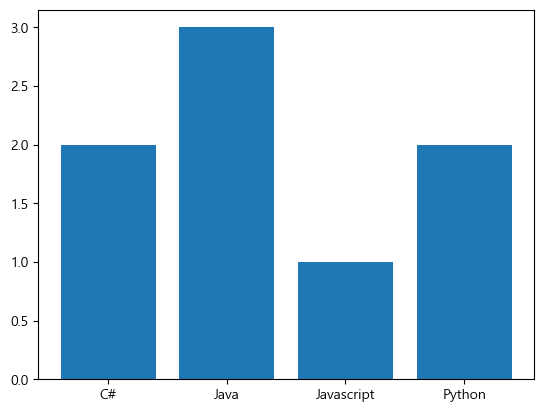

In [7]:
plt.bar(group.index, group.values)
plt.show()

In [8]:
df

,지원번호,이름,학교,키,국어,영어,수학,과학,사회,SW특기,평균
0,1번,채치수,북산고,197,90,85,100,95,85,Python,91.0
1,2번,정대만,북산고,184,40,35,50,55,25,Java,41.0
2,3번,송태섭,북산고,168,80,75,70,80,75,Javascript,76.0
3,4번,서태웅,북산고,187,40,60,70,75,80,Java,65.0
4,5번,강백호,북산고,188,15,20,10,35,10,Java,18.0
5,6번,변덕규,능남고,202,80,100,95,85,80,C#,88.0
6,7번,황태산,능남고,188,55,65,45,40,35,Python,48.0
7,8번,윤대협,능남고,190,100,85,90,95,95,C#,93.0


In [9]:
index = list(df.index)
index
df.loc[0, '국어'] + df.loc[0, '영어'] + df.loc[0, '수학']

np.int64(275)

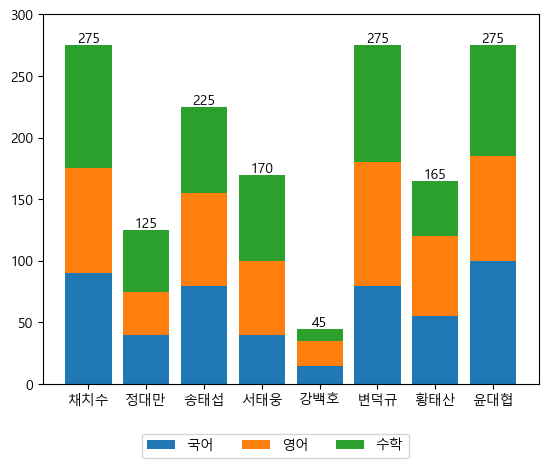

In [10]:
plt.bar(df['이름'], df['국어'], label='국어')
plt.bar(df['이름'], df['영어'], label='영어', bottom=df['국어'])
plt.bar(df['이름'], df['수학'], label='수학', bottom=df['국어']+df['영어'])
plt.ylim(0, 300)
plt.legend(loc=(0.2, -0.2), ncol=3)
for idx in df.index:
    sum = df.loc[idx, '국어']+df.loc[idx, '영어']+df.loc[idx, '수학']
    plt.text(idx, sum+2, sum, ha='center')
plt.show()

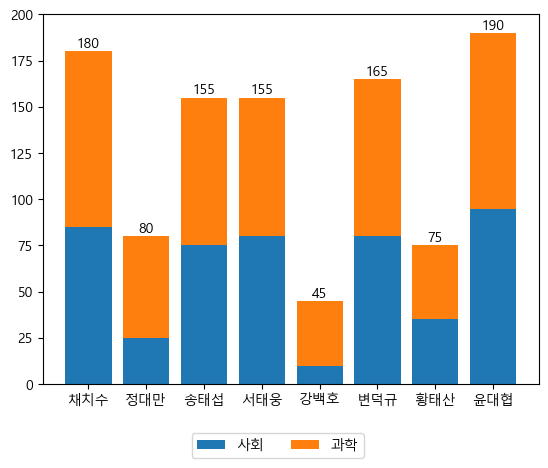

In [11]:
#학생별 사회, 과학 누적막대그래프
plt.bar(df['이름'], df['사회'], label='사회')
plt.bar(df['이름'], df['과학'], label='과학', bottom=df['사회'])
plt.legend(loc=(0.3, -0.2), ncol=2)
plt.ylim(0, 200)
for idx in df.index:
    sum = df.loc[idx, '사회']+df.loc[idx, '과학']
    plt.text(idx, sum+2, sum, ha='center')
plt.show()

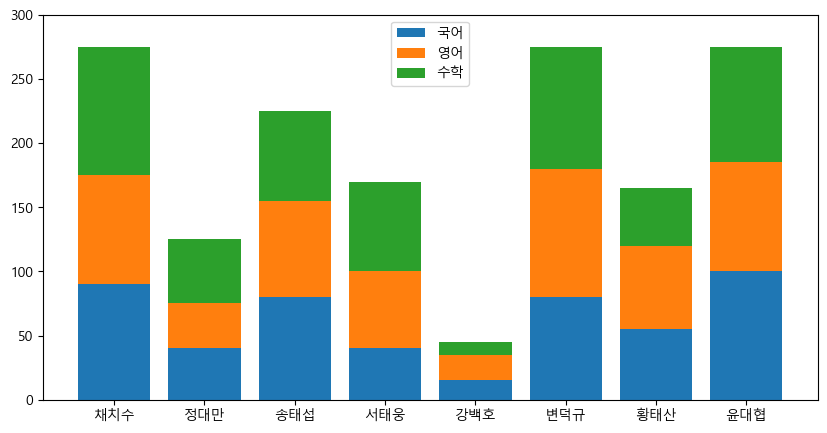

In [18]:
plt.figure(figsize=(10, 5))
plt.bar(df['이름'], df['국어'], label='국어')
plt.bar(df['이름'], df['영어'], bottom=df['국어'], label='영어')
plt.bar(df['이름'], df['수학'], bottom=df['국어']+df['영어'], label='수학')
plt.legend()
plt.ylim(0, 300)
plt.show()